In [257]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import skew
import math

In [30]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [31]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [45]:
# train.describe().T

## Part 1 Data Cleaning

### Clean Traning Data

In [33]:
num = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
null_data = pd.concat([num,percent],keys=['null_num','percentage'],axis=1)


In [34]:
null_data.head(40)

,null_num,percentage
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
GarageQual,78,0.053461
GarageFinish,78,0.053461
GarageCond,78,0.053461


In [35]:
train = train.drop(null_data[null_data['null_num']>1].index, axis=1)


In [42]:
# train.isnull().sum()

In [41]:
# Dealing with missing data

train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])
train.isnull().sum().max()

0

### Clean Test Data

In [47]:
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [49]:
num1 = test.isnull().sum().sort_values(ascending=False)
percent1 =  (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
test_null = pd.concat([num1,percent1],keys=['null_num','percentage'],axis=1)

In [74]:
test_null 

,null_num,percentage
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
...,...,...
Electrical,0,0.000000
1stFlrSF,0,0.000000
2ndFlrSF,0,0.000000
LowQualFinSF,0,0.000000


In [77]:
test.drop((test_null[test_null['null_num']>4]).index,1)

In [78]:
num1 = test.isnull().sum().sort_values(ascending=False)
percent1 =  (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
test_null = pd.concat([num1,percent1],keys=['null_num','percentage'],axis=1)

In [82]:
test_null.head(20)

,null_num,percentage
MSZoning,4,0.002742
Functional,2,0.001371
BsmtFullBath,2,0.001371
BsmtHalfBath,2,0.001371
Utilities,2,0.001371
BsmtUnfSF,1,0.000685
BsmtFinSF2,1,0.000685
Exterior2nd,1,0.000685
GarageCars,1,0.000685
GarageArea,1,0.000685


In [86]:
null_features = test_null[test_null['null_num']>0].index

In [87]:
null_features

Index(['MSZoning', 'Functional', 'BsmtFullBath', 'BsmtHalfBath', 'Utilities',
       'BsmtUnfSF', 'BsmtFinSF2', 'Exterior2nd', 'GarageCars', 'GarageArea',
       'BsmtFinSF1', 'KitchenQual', 'Exterior1st', 'TotalBsmtSF', 'SaleType'],
      dtype='object')

In [103]:
for f in null_features:
    test[f]=test[f].fillna(test[f].mode()[0])

## Part 2 Plotting

In [107]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   LotArea        1460 non-null   int64 
 3   Street         1460 non-null   object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  OverallQual    1460 non-null   int64 
 14  OverallCond    1460 non-null   int64 
 15  YearBuilt      1460 non-null   int64 
 16  YearRemodAdd   1460 non-null   int64 
 17  RoofStyle      1460 non-null   object
 18  RoofMatl       1460 non-null

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

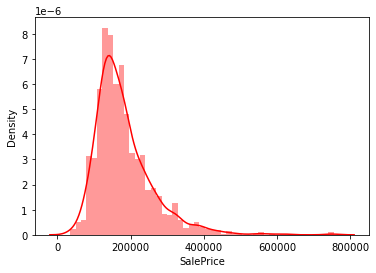

In [118]:
sns.distplot(train['SalePrice'],color='red')

In [115]:
train.shape

(1460, 58)

In [119]:
train.iloc[1].T

Id                     2
MSSubClass            20
LotArea             9600
Street              Pave
LotShape             Reg
LandContour          Lvl
LotConfig            FR2
LandSlope            Gtl
Neighborhood     Veenker
Condition1         Feedr
Condition2          Norm
BldgType            1Fam
HouseStyle        1Story
OverallQual            6
OverallCond            8
YearBuilt           1976
YearRemodAdd        1976
RoofStyle          Gable
RoofMatl         CompShg
Exterior1st      MetalSd
Exterior2nd      MetalSd
ExterQual             TA
ExterCond             TA
Foundation        CBlock
BsmtFinSF1           978
BsmtFinSF2             0
BsmtUnfSF            284
TotalBsmtSF         1262
Heating             GasA
HeatingQC             Ex
CentralAir             Y
Electrical         SBrkr
1stFlrSF            1262
2ndFlrSF               0
LowQualFinSF           0
GrLivArea           1262
FullBath               2
HalfBath               0
BedroomAbvGr           3
KitchenAbvGr           1


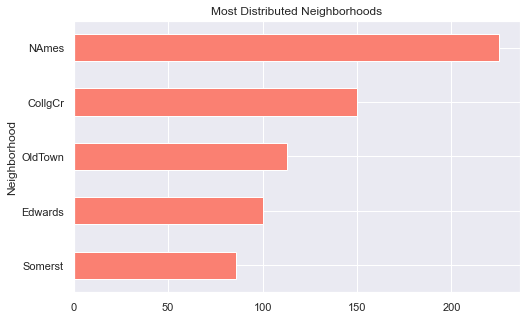

In [322]:
x = train.groupby('Neighborhood').count().sort_values(by='Id', ascending=True)['Id'].iloc[-5:].plot(kind="barh",figsize=(8,5), title="Most Distributed Neighborhoods",color='salmon')

# ax = sns.barplot(data=train.groupby('Neighborhood').count().sort_values(by='Id', ascending=True)['Id'])
# ax = sns.barplot(x="tip", y="day", data=tips)
plt.show()

In [300]:
# x = train['sal'.groupby('Neighborhood').mean.sort_values(by='Id', ascending=True)['Id'].iloc[-5:].plot(kind="barh",figsize=(8,5), title="Top 5 Neighborhoods",color='salmon')


# plt.show()

<AxesSubplot:title={'center':'Average House Price/Neighborhood'}, ylabel='Neighborhood'>

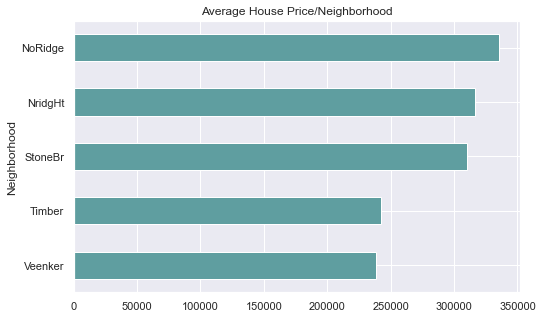

In [321]:
train.groupby(['Neighborhood']).mean().sort_values(by='SalePrice', ascending=True)['SalePrice'].iloc[-5:].plot(kind="barh",figsize=(8,5), title="Average House Price/Neighborhood",color='cadetblue')

* Most distributed: North Ames / College Creek / Old Town / Edwards / Somerset
* Most expensive: 

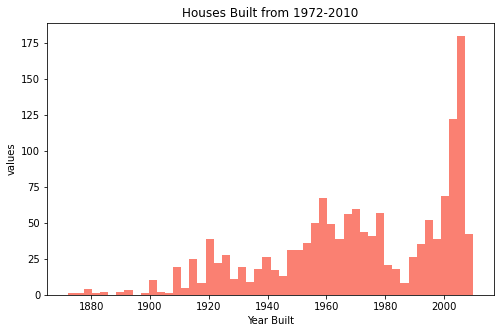

In [236]:
plt.figure(figsize=(8,5))
plt.hist(train['YearBuilt'],bins=50,color='salmon')

plt.title('Houses Built from 1972-2010')
plt.xlabel('Year Built')
plt.ylabel('values')
plt.show() 
# figsize=(8,8

In [203]:
train['YearBuilt']

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

In [261]:
# time_df = train['year']
quality=train[['YearBuilt','OverallQual']].sort_values(by='YearBuilt')
quality

,YearBuilt,OverallQual
1349,1872,8
1137,1875,5
747,1880,7
304,1880,7
1132,1880,6
...,...,...
898,2009,9
515,2009,10
157,2009,8
762,2009,7


In [275]:
quality1 = train[['YearBuilt','OverallCond']].sort_values(by='YearBuilt')

* We can take a look here and figure out why they don't have similar trends

<AxesSubplot:xlabel='YearBuilt', ylabel='OverallQual'>

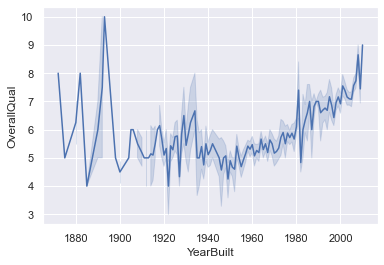

In [265]:
sns.lineplot(x=quality['YearBuilt'],y=quality['OverallQual'])

<AxesSubplot:xlabel='YearBuilt', ylabel='OverallCond'>

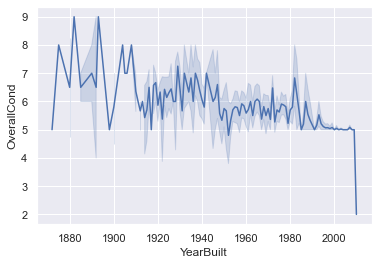

In [277]:
sns.lineplot(x=quality1['YearBuilt'],y=quality1['OverallCond'])

In [279]:
# quality1[quality1['OverallCond']<5]

In [272]:
quality.sort_values(by='OverallQual',ascending=False)

,YearBuilt,OverallQual
691,1994,10
185,1892,10
591,2008,10
1442,2008,10
58,2006,10
...,...,...
1100,1920,2
636,1936,2
916,1949,2
375,1922,1


## Part 3 Modeling 

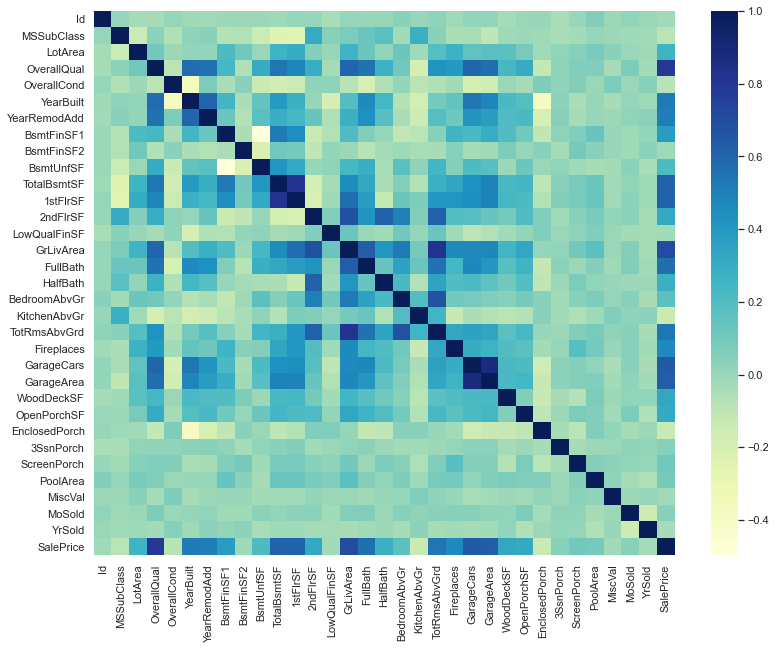

In [296]:
# sns.color_palette("Spectral", as_cmap=True)
corrMatrix = train.corr()
plt.figure(figsize=(13,10))
sns.heatmap(corrMatrix, annot=False,cmap="YlGnBu")
plt.show()
# Wistia
# YlGnBu